In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline


plt.rcParams['font.size'] = 18

In [2]:
## The file size is 1.5 gb. hence we will read only 50,000 rows

df = pd.read_csv('../NY_Taxi_Fair/train.csv', nrows = 1_000_000)

In [3]:
df.shape

(1000000, 8)

In [4]:
## inspect the data
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.drop('key', axis = 1, inplace=True)

In [6]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [7]:
df.isnull().any().sum()

2

#### There are 2 missing values

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().any().sum()

0

In [10]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.347953,-72.526699,39.929040,-72.527860,39.919954,1.684941
std,9.821790,12.057778,7.626087,11.324494,8.201418,1.323907
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


C:\ProgramData\Anaconda\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


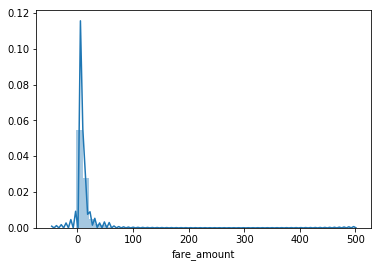

In [11]:
sns.distplot(df['fare_amount'])

In [12]:
## Find a little insights about the fair, as we see outliers are there
print(f"There are {df[df['fare_amount']<0].shape[0]} negative fairs")
print(f"There are {df[df['fare_amount']==0].shape[0]} Zero")
print(f"There are {df[df['fare_amount']>100].shape[0]} fare more than avg.")

There are 38 negative fairs
There are 29 Zero
There are 396 fare more than avg.


Here in this case we will remove all fairs less than 2.5 dollars, 
and more than $100, while making another model we will change this data and see our result

In [13]:
df = df[df['fare_amount'].between(left=2.5, right=100)]

In [14]:
df.head(2)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1


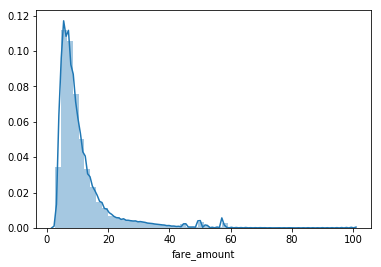

In [15]:
sns.distplot(df['fare_amount'])

Here we see a normalised curve, but its not clearly visible

In [16]:
## Make bins of fare
df['fare_bin'] = pd.cut(df['fare_amount'], bins=list(range(0, 50 , 5))).astype(str)

In [17]:
df.head(4)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_bin
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,"(0, 5]"
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,"(15, 20]"
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,"(5, 10]"
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,"(5, 10]"


In [18]:
## Uppermost bin
df.loc[df['fare_bin'] == 'nan', 'fare_bin']  = "[45+]"

Text(0.5, 1.0, 'fare-binned')

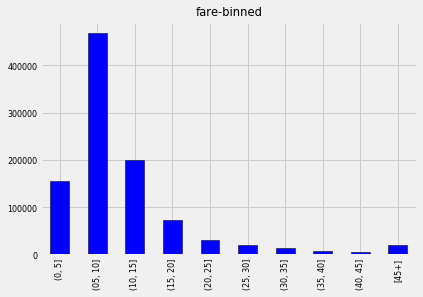

In [19]:
## Create a bar plot of value counts
palette = sns.color_palette('Paired', 10)
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 8



df.loc[df['fare_bin']== '(5, 10]', 'fare_bin'] = '(05, 10]'
df['fare_bin'].value_counts().sort_index().plot(kind='bar', color='b', edgecolor='k')
plt.title('fare-binned')

      Our plot shows the plot is heavily skewed, most of the fair lies below $20, 
      we will remove it, but first lets have a look on passanger counts, there seems to be a relationship between 
      passanger count

Text(0, 0.5, 'Frequency')

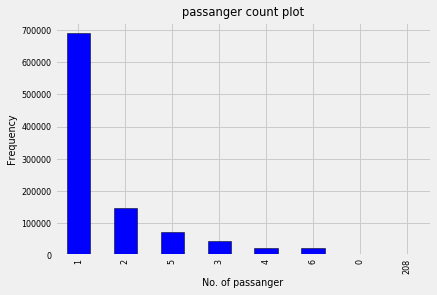

In [20]:
df['passenger_count'].value_counts().plot.bar(color = 'b', edgecolor= 'k')
plt.title('passanger count plot')
plt.xlabel('No. of passanger')
plt.ylabel('Frequency')

We dont have any passanger greater than 6

In [21]:
## Find the absolute difference between longitude and latitude, i.e substract the longitude and latitude

df['abs_lat_diff'] = (df['dropoff_latitude']) - (df['pickup_latitude']).abs()
df['abs_lon_diff'] = (df['dropoff_longitude']) - (df['pickup_longitude']).abs()

In [22]:
df.head(3)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_bin,abs_lat_diff,abs_lon_diff
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,"(0, 5]",-0.009041,-147.685921
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,"(15, 20]",0.070701,-147.995316
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,"(05, 10]",-0.010708,-147.973980


In [23]:
## Plot the lat_diff and lon_diff to know were there any outliers

In [24]:
#df['abs_lat_diff'].value_counts().plot.bar()

C:\ProgramData\Anaconda\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


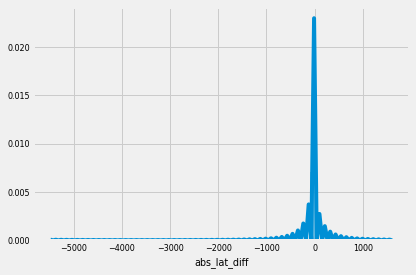

In [25]:
sns.distplot(df['abs_lat_diff'])


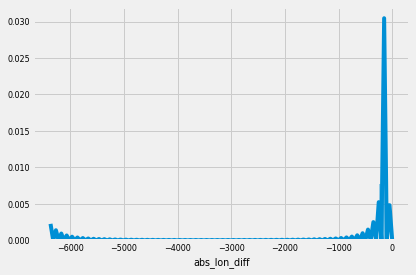

In [26]:
sns.distplot(df['abs_lon_diff'])

In [27]:
## The variance is very high, reducing it will help us

In [30]:
# Remove latitude and longtiude outliers
"""
data = df.loc[df['pickup_latitude'].between(40, 42)]
data = df.loc[df['pickup_longitude'].between(-75, -72)]
data = df.loc[df['dropoff_latitude'].between(40, 42)]
data = df.loc[df['dropoff_longitude'].between(-75, -72)]"""

"\ndata = df.loc[df['pickup_latitude'].between(40, 42)]\ndata = df.loc[df['pickup_longitude'].between(-75, -72)]\ndata = df.loc[df['dropoff_latitude'].between(40, 42)]\ndata = df.loc[df['dropoff_longitude'].between(-75, -72)]"

In [31]:
"""data.head()"""

'data.head()'

In [32]:
"""data['pickup_datetime'].value_counts().plot()"""

"data['pickup_datetime'].value_counts().plot()"

In [33]:
"""sns.distplot(data['dropoff_latitude'])"""

"sns.distplot(data['dropoff_latitude'])"

In [34]:
## Plot longitude and latitude against each other

In [35]:
"""fig, axes = plt.subplots(1, 2, figsize = (20, 8), sharex=True, sharey=True)
axes = axes.flatten()

sns.regplot('pickup_longitude', 'pickup_latitude', fit_reg = False, 
            data = data.sample(100000, random_state = 100), ax = axes[0])

sns.regplot('dropoff_longitude', 'dropoff_latitude', fit_reg = False, 
            data = data.sample(100000, random_state = 100), ax = axes[1]);
axes[0].set_title('Pickup Locations')
axes[1].set_title('Dropoff Locations');"""

"fig, axes = plt.subplots(1, 2, figsize = (20, 8), sharex=True, sharey=True)\naxes = axes.flatten()\n\nsns.regplot('pickup_longitude', 'pickup_latitude', fit_reg = False, \n            data = data.sample(100000, random_state = 100), ax = axes[0])\n\nsns.regplot('dropoff_longitude', 'dropoff_latitude', fit_reg = False, \n            data = data.sample(100000, random_state = 100), ax = axes[1]);\naxes[0].set_title('Pickup Locations')\naxes[1].set_title('Dropoff Locations');"

In [36]:
"""## there are out liers, remove them
len(data[data['pickup_longitude']>-10])"""

"## there are out liers, remove them\nlen(data[data['pickup_longitude']>-10])"

In [37]:
"""len(data[data['dropoff_latitude']>50])"""

"len(data[data['dropoff_latitude']>50])"

In [38]:
"""# Remove latitude and longtiude outliers
data = df.loc[df['pickup_latitude'].between(left= 0, right= 50)]
data = df.loc[df['pickup_longitude'].between(left = -80,right = -20)]
data = df.loc[df['dropoff_latitude'].between(left = 0,right= 100)]
data = df.loc[df['dropoff_longitude'].between(left = -80,right= -60)]"""

"# Remove latitude and longtiude outliers\ndata = df.loc[df['pickup_latitude'].between(left= 0, right= 50)]\ndata = df.loc[df['pickup_longitude'].between(left = -80,right = -20)]\ndata = df.loc[df['dropoff_latitude'].between(left = 0,right= 100)]\ndata = df.loc[df['dropoff_longitude'].between(left = -80,right= -60)]"

In [39]:
"""fig, axes = plt.subplots(1, 2, figsize = (20, 8), sharex=True, sharey=True)
axes = axes.flatten()

sns.regplot('pickup_longitude', 'pickup_latitude', fit_reg = False, 
            data = data.sample(100000, random_state = 100), ax = axes[0])

sns.regplot('dropoff_longitude', 'dropoff_latitude', fit_reg = False, 
            data = data.sample(100000, random_state = 100), ax = axes[1]);
axes[0].set_title('Pickup Locations')
axes[1].set_title('Dropoff Locations');"""

"fig, axes = plt.subplots(1, 2, figsize = (20, 8), sharex=True, sharey=True)\naxes = axes.flatten()\n\nsns.regplot('pickup_longitude', 'pickup_latitude', fit_reg = False, \n            data = data.sample(100000, random_state = 100), ax = axes[0])\n\nsns.regplot('dropoff_longitude', 'dropoff_latitude', fit_reg = False, \n            data = data.sample(100000, random_state = 100), ax = axes[1]);\naxes[0].set_title('Pickup Locations')\naxes[1].set_title('Dropoff Locations');"

In [40]:
## nothing is happening, lets do it one by one

In [41]:
"""data = df.loc[(df['pickup_latitude']>0) & (df['pickup_latitude']<50)]"""

"data = df.loc[(df['pickup_latitude']>0) & (df['pickup_latitude']<50)]"

In [42]:
"""data.describe()"""

'data.describe()'

In [43]:
"""data = data.loc[(data['pickup_longitude']<-50)&(data['pickup_longitude']>-100)]"""

"data = data.loc[(data['pickup_longitude']<-50)&(data['pickup_longitude']>-100)]"

In [44]:
"""data.describe()"""

'data.describe()'

In [45]:
"""data = data.loc[(data['pickup_latitude']>0) & (data['pickup_latitude']<50)]

data = data.loc[(data['dropoff_longitude']>-100) & (data['dropoff_longitude']<-60)]
data = data.loc[(data['dropoff_latitude']>0) & (data['dropoff_latitude']<100)]"""

"data = data.loc[(data['pickup_latitude']>0) & (data['pickup_latitude']<50)]\n\ndata = data.loc[(data['dropoff_longitude']>-100) & (data['dropoff_longitude']<-60)]\ndata = data.loc[(data['dropoff_latitude']>0) & (data['dropoff_latitude']<100)]"

In [46]:
"""data.describe()"""

'data.describe()'

In [47]:
"""fig, axes = plt.subplots(1, 2, figsize = (20, 8), sharex=True, sharey=True)
axes = axes.flatten()

sns.regplot('pickup_longitude', 'pickup_latitude', fit_reg = False, 
            data = data.sample(100000, random_state = 100), ax = axes[0])

sns.regplot('dropoff_longitude', 'dropoff_latitude', fit_reg = False, 
            data = data.sample(100000, random_state = 100), ax = axes[1]);
axes[0].set_title('Pickup Locations')
axes[1].set_title('Dropoff Locations');"""

"fig, axes = plt.subplots(1, 2, figsize = (20, 8), sharex=True, sharey=True)\naxes = axes.flatten()\n\nsns.regplot('pickup_longitude', 'pickup_latitude', fit_reg = False, \n            data = data.sample(100000, random_state = 100), ax = axes[0])\n\nsns.regplot('dropoff_longitude', 'dropoff_latitude', fit_reg = False, \n            data = data.sample(100000, random_state = 100), ax = axes[1]);\naxes[0].set_title('Pickup Locations')\naxes[1].set_title('Dropoff Locations');"

In [48]:
## Lets not consider them as outliers

# Feature Engineering
    A process of creating predictors, which can predict target more accurately than existing features

In [49]:
##Plot abs_lat and abs_lon on a graph

In [50]:
"""sns.lmplot(x='abs_lat_diff', y='abs_lon_diff', data=data.sample(10000), fit_reg=False)
plt.title('absolute lat vs absolute lon')"""

"sns.lmplot(x='abs_lat_diff', y='abs_lon_diff', data=data.sample(10000), fit_reg=False)\nplt.title('absolute lat vs absolute lon')"

In [51]:
"""data = data.drop(['abs_lat_diff', 'abs_lon_diff'], axis=1)"""

"data = data.drop(['abs_lat_diff', 'abs_lon_diff'], axis=1)"

In [52]:
"""data.head()"""

'data.head()'

In [53]:
"""df.head()"""

'df.head()'

## Checkpoint 1

In [28]:
df1 = df.copy()

In [29]:
df1.shape

(999517, 10)

In [30]:
df1 = df1.loc[(df1['pickup_latitude']>0) & (df1['pickup_latitude']<50)]
df1 = df1.loc[(df1['pickup_longitude']<-50)&(df1['pickup_longitude']>-100)]

df1 = df1.loc[(df1['dropoff_longitude']>-100) & (df1['dropoff_longitude']<-60)]
df1 = df1.loc[(df1['dropoff_latitude']>0) & (df1['dropoff_latitude']<100)]

Text(0.5, 1.0, 'dropoff_location')

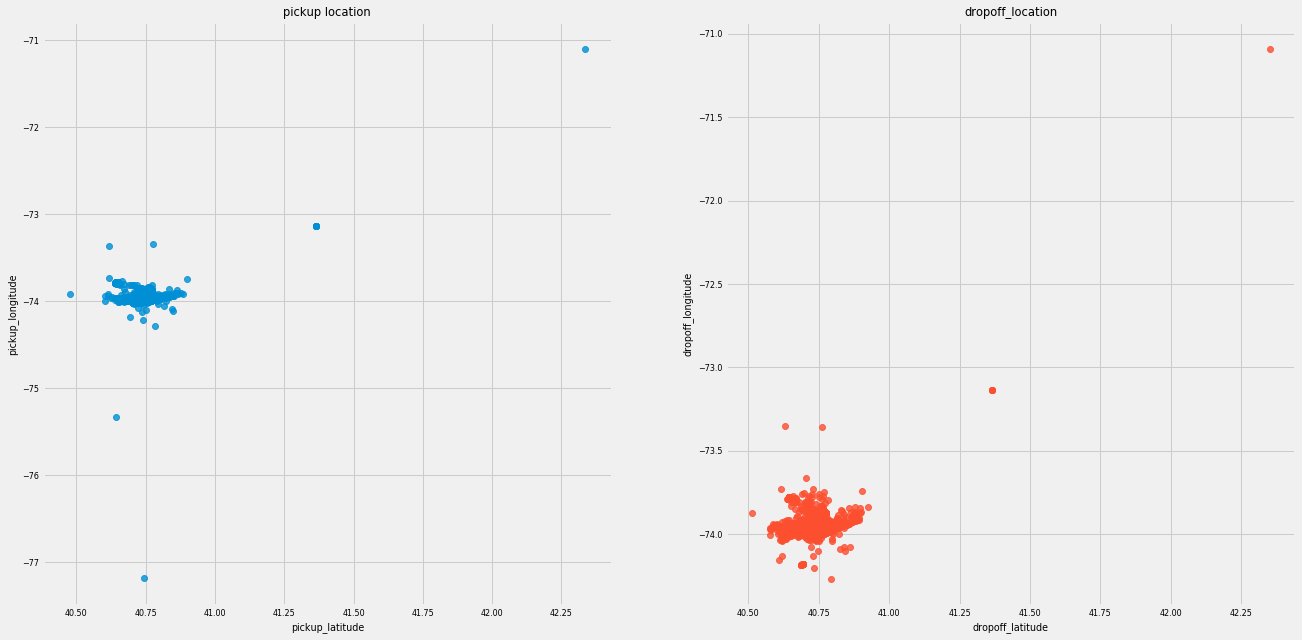

In [31]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
axes = axes.flatten()

sns.regplot(x ="pickup_latitude" , y ="pickup_longitude" , data = df1.sample(10000, random_state=100),fit_reg=False, ax=axes[0])
sns.regplot(x ="dropoff_latitude" , y ="dropoff_longitude" , data = df1.sample(10000, random_state=100),fit_reg=False, ax=axes[1])
axes[0].set_title('pickup location')
axes[1].set_title('dropoff_location')

In [32]:
## Lets create absolute difference, and check no travel at all
df1['abs_lat_diff'] = (df1['pickup_latitude'])-(df1['dropoff_latitude'])

df1['abs_lon_diff'] = (df1['pickup_longitude'])-(df1['dropoff_longitude'])

In [33]:
df1.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_bin,abs_lat_diff,abs_lon_diff
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,"(0, 5]",0.009041,-0.002701
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,"(15, 20]",-0.070701,-0.036780
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,"(05, 10]",0.010708,0.008504
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,"(05, 10]",-0.024949,0.004437
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,"(05, 10]",-0.015754,-0.011440


In [34]:
## find out how many 0.0 are lat lon diff

In [35]:
no_diff = df1[(df1['abs_lat_diff']==0) &(df1['abs_lon_diff']==0)]

In [36]:
len(no_diff)

10497

#### This is strange that there was no difference between the lat lon

C:\ProgramData\Anaconda\envs\nlp\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, '')

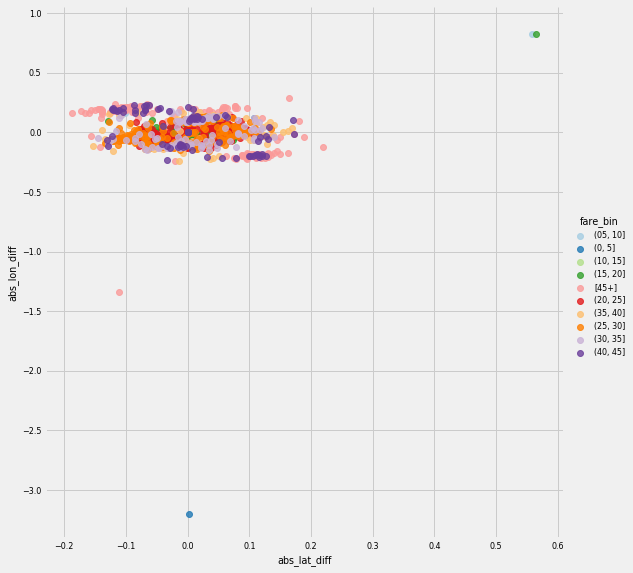

In [37]:
## Plot the regplot with fare_bin
sns.lmplot(x= 'abs_lat_diff', y='abs_lon_diff', hue='fare_bin', data = df1.sample(10000, random_state=100),
           fit_reg=False,size = 8, palette=palette)
plt.title('')

C:\ProgramData\Anaconda\envs\nlp\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'absolute latitude longitude _fare')

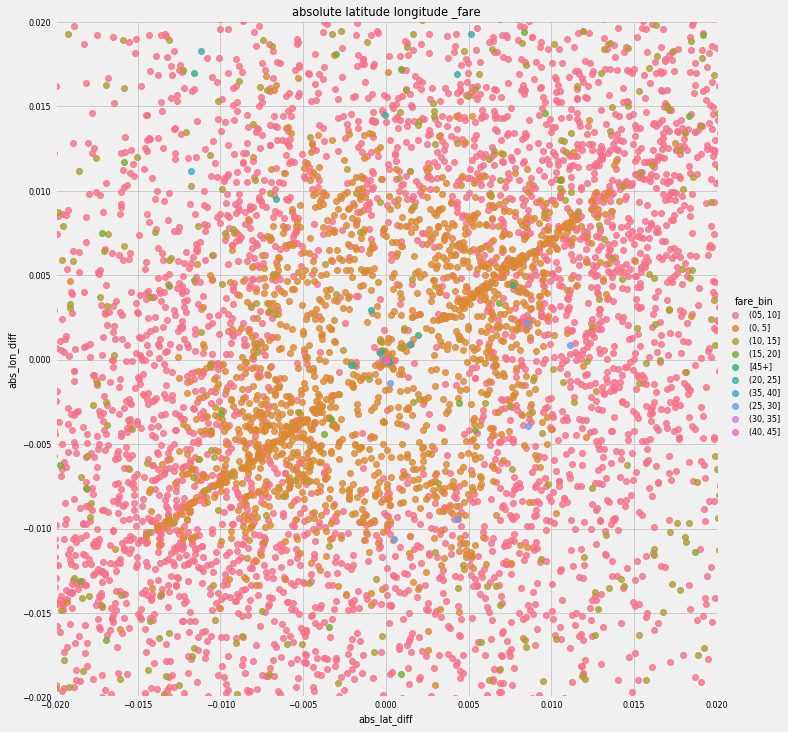

In [38]:
## Lets have a closer look 

sns.lmplot(x= 'abs_lat_diff', y = 'abs_lon_diff', hue='fare_bin', 
           data= df1.sample(10000, random_state=100), fit_reg=False, size=10)

plt.xlim((-0.02,0.02))
plt.ylim((-0.02,0.02))
plt.title('absolute latitude longitude _fare')

C:\ProgramData\Anaconda\envs\nlp\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'absolute latitude longitude _fare')

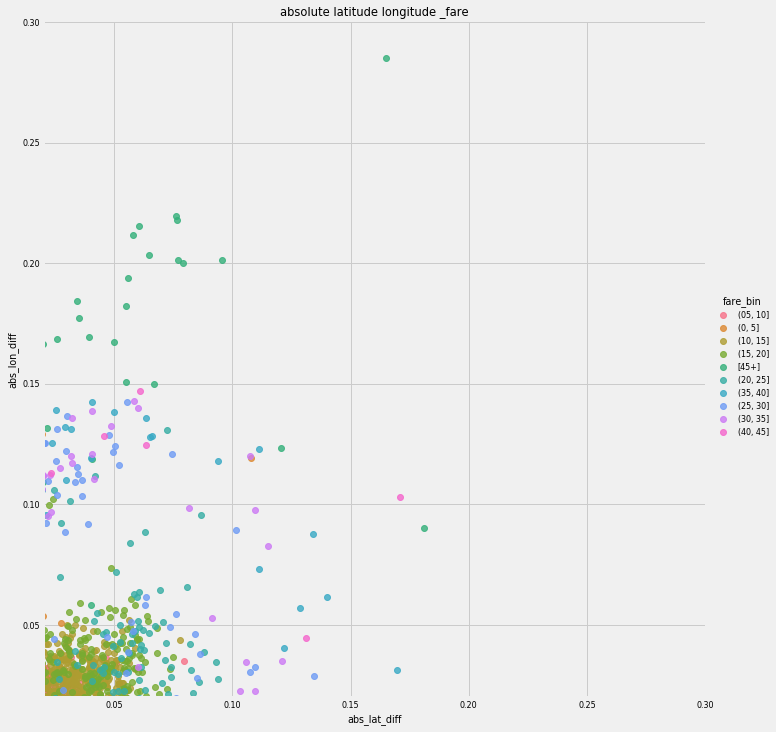

In [39]:
sns.lmplot(x= 'abs_lat_diff', y = 'abs_lon_diff', hue='fare_bin', 
           data= df1.sample(10000, random_state=100), fit_reg=False, size=10)

plt.xlim((0.02,0.3))
plt.ylim((0.02,0.3))
plt.title('absolute latitude longitude _fare')

In [40]:
## Calculate the distance between the lat lon, using Eculidean and manhatten distance
def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2-x1)**p) + (abs(y2-y1))**p)**(1/p)


In [41]:
minkowski_distance(0,3,0,4,2)

5.0

In [42]:
df1['Manhattan'] = minkowski_distance(df1['pickup_longitude'], df1['dropoff_longitude'], 
                                     df1['pickup_latitude'], df1['dropoff_latitude'], 1)

In [43]:
## Calculate distribution by each fare bin

plt.figure(figsize=(12,8))


<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [70]:
df2 = df1.groupby('fare_bin')

In [71]:
df2

In [76]:
for f, grouped in df1.groupby('fare_bin'):
    print(f, grouped)


(0, 5]         fare_amount          pickup_datetime  pickup_longitude  \
0               4.5  2009-06-15 17:26:21 UTC        -73.844311   
12              4.1  2009-11-06 01:04:03 UTC        -73.991601   
19              4.0  2014-12-06 20:36:22 UTC        -73.979815   
22              4.5  2009-08-06 18:17:23 UTC        -73.991707   
23              4.9  2010-12-06 12:29:00 UTC        -74.000632   
27              4.5  2011-06-28 19:47:00 UTC        -73.988893   
29              4.5  2013-08-11 00:52:00 UTC        -73.981020   
36              4.5  2015-03-12 08:08:38 UTC        -73.990173   
46              4.5  2011-06-01 20:30:00 UTC        -73.980822   
47              3.3  2011-12-14 07:53:00 UTC        -73.988877   
48              3.3  2012-07-18 00:16:00 UTC        -73.986660   
60              5.0  2014-07-16 10:57:00 UTC        -73.996148   
61              4.5  2011-04-22 23:21:03 UTC        -74.009137   
62              4.9  2012-01-02 14:54:00 UTC        -74.003985   
69 

[19707 rows x 11 columns]


In [ ]:
for f,grouped in df1.groupby('fare_bin'):
    sns.kdeplot(grouped)

In [77]:
df1.head(2)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_bin,abs_lat_diff,abs_lon_diff,Manhattan
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,"(0, 5]",0.009041,-0.002701,0.011742
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,"(15, 20]",-0.070701,-0.036780,0.107481


In [78]:
df1.Manhattan.mean()

0.046573131198396345

In [79]:
df1.groupby('fare_bin').Manhattan.mean()

fare_bin
(0, 5]      0.014657
(05, 10]    0.028185
(10, 15]    0.050832
(15, 20]    0.072484
(20, 25]    0.099038
(25, 30]    0.125682
(30, 35]    0.142255
(35, 40]    0.154357
(40, 45]    0.194621
[45+]       0.256362
Name: Manhattan, dtype: float64

In [83]:
for j,i in df1.groupby('fare_bin').Manhattan.mean():
    print(i)

TypeError: cannot unpack non-iterable float object

In [85]:
for j,i in df1.groupby('fare_bin'):
    print(j)

(0, 5]
(05, 10]
(10, 15]
(15, 20]
(20, 25]
(25, 30]
(30, 35]
(35, 40]
(40, 45]
[45+]


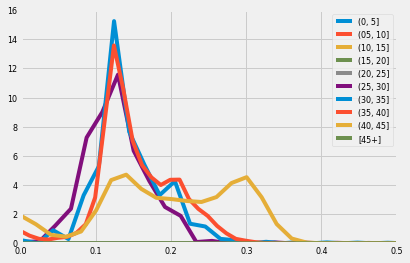

In [93]:
for j,i in df1.groupby('fare_bin'):
    sns.kdeplot(i['Manhattan'], label = f'{j}')
    plt.xlim((0,0.5))

In [44]:
df1['euclidean'] = minkowski_distance(df1['pickup_longitude'], df1['dropoff_longitude'],
                                       df1['pickup_latitude'], df1['dropoff_latitude'], 2)


In [45]:
df1.head(2)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_bin,abs_lat_diff,abs_lon_diff,Manhattan,euclidean
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,"(0, 5]",0.009041,-0.002701,0.011742,0.009436
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,"(15, 20]",-0.070701,-0.036780,0.107481,0.079696


In [46]:
df1.groupby('fare_bin')['euclidean'].agg(['mean', 'count'])

,mean,count
fare_bin,,
"(0, 5]",0.011796,151933
"(05, 10]",0.022262,459926
"(10, 15]",0.039542,195222
"(15, 20]",0.055438,71981
"(20, 25]",0.077197,31194
"(25, 30]",0.101258,19605
"(30, 35]",0.117318,14414
"(35, 40]",0.127885,8395
"(40, 45]",0.154382,6780


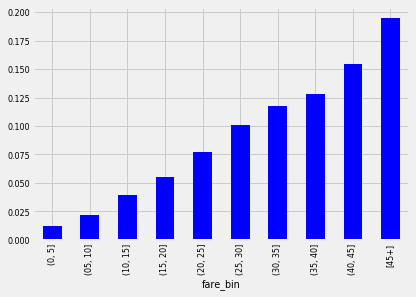

In [51]:
df1.groupby('fare_bin')['euclidean'].mean().plot(kind = 'bar', color= 'b')

We clearly see, as the fare rises the distance travelled also rises, this feature will be usefull.

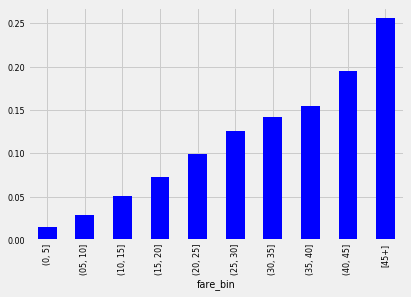

In [53]:
df1.groupby('fare_bin')['Manhattan'].mean().plot.bar(color='b')

Manhattan also gives the same result as above

Now, passanger count can give us insight about the fare_bin

In [58]:
df1.groupby('passenger_count')['fare_amount'].agg(['max', 'min', 'mean'])

,max,min,mean
passenger_count,,,
0,90.00,2.5,8.716729
1,100.00,2.5,11.155839
2,99.30,2.5,11.752523
3,100.00,2.5,11.467057
4,93.50,2.5,11.659320
5,93.81,2.5,11.189260
6,99.75,2.5,12.255897


In [59]:
df1.groupby('fare_bin')['passenger_count'].agg(['max', 'min', 'mean'])

,max,min,mean
fare_bin,,,
"(0, 5]",6,0,1.641375
"(05, 10]",6,0,1.680925
"(10, 15]",6,0,1.699506
"(15, 20]",6,0,1.710299
"(20, 25]",6,0,1.706931
"(25, 30]",6,0,1.689416
"(30, 35]",6,0,1.740391
"(35, 40]",6,0,1.749136
"(40, 45]",6,0,1.752360


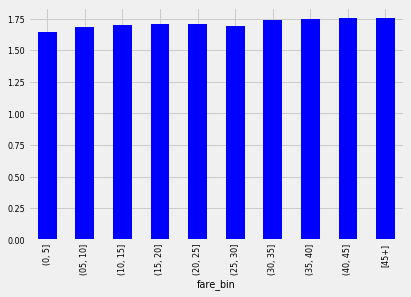

In [68]:
df1.groupby('fare_bin')['passenger_count'].mean().plot(kind='bar', color = 'b')

Passenger count is lower at lower fare_bin, and pasenger count is high at higher fare_bin

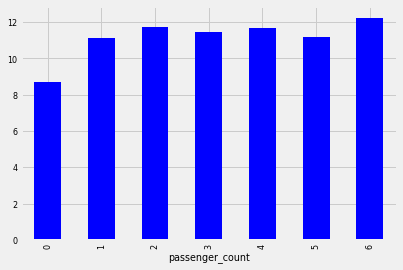

In [69]:
df1.groupby('passenger_count')['fare_amount'].mean().plot(kind='bar', color= 'b')

In [70]:
## Pickle df1 file

In [71]:
df1.head(3)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_bin,abs_lat_diff,abs_lon_diff,Manhattan,euclidean
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,"(0, 5]",0.009041,-0.002701,0.011742,0.009436
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,"(15, 20]",-0.070701,-0.036780,0.107481,0.079696
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,"(05, 10]",0.010708,0.008504,0.019212,0.013674


In [72]:
df1.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'fare_bin',
       'abs_lat_diff', 'abs_lon_diff', 'Manhattan', 'euclidean'],
      dtype='object')

In [75]:
pickle_out = open('train_taxi.pickle', 'wb')
pickle.dump(df1, pickle_out)
pickle_out.close()

In [73]:
import pickle